In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from scipy.linalg import hankel
from numpy import genfromtxt

In [2]:
def anomaly_detection(s, N, L, r):
    T = len(s)
    K = N - L + 1 

    train = s[:N+1]
    # Training Phase
    X = hankel(train[:L], train[L-1:])  # Hankel matrix
    U, e, _ = svd(X, full_matrices=False)

    # Scree plot
    plt.figure()
    plt.plot(np.round((np.square(e[1:])/(np.sum(np.square(e[1:]))))*100, decimals=1), 'rx-', color='darkred', linewidth=2)
    plt.xlabel('Number of eigenvalues')
    plt.ylabel('Eigenvalue share (%)')
    plt.title('Scree plot')
    plt.show()

    # Select r based on eigenvalue significance looking at the plot
    U = U[:, :r]  # signal subspace
    c = np.mean(X[:K], axis=1)
    utc = U.T @ c

    D=np.zeros(K)
        
    for j in range(K):	
        D[j]=np.linalg.norm(utc - U.T @ X[:,j])

    dmax=np.amax(D)	

    # Detection Phase
    d = np.zeros(T - N - L - 1)
    x = s[N+1:]
    Xt = hankel(s[N+1:N+1+L], s[N+L:T-1])  # Hankel matrix

    for i in range(T - N - L -1):        
        y = utc - U.T @ Xt[:,i]
        d[i] = y.T @ y


    # Plot of the result
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 1, 1)
    plt.plot(range(0, N+1), s[:N+1], color='blue', label='Training Data')
    plt.plot(range(N, T), s[N:], color='red', label='Test Data')
    plt.ylabel(f'Sensor {sensor_index+1} Measurements')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(range(N+1, T-L), d, color='blue', label = 'Test Data')
    # plt.plot(range(N), d1, color='green', label='Training Data')
    plt.axhline(y=dmax, color='r', linestyle='--', label='Classifier Threshold')
    plt.xlabel('Observation Index')
    plt.ylabel('Departure Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

C:\Users\sauga\AppData\Local\Temp\ipykernel_17252\766748577.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.round((np.square(e[1:])/(np.sum(np.square(e[1:]))))*100, decimals=1), 'rx-', color='darkred', linewidth=2)


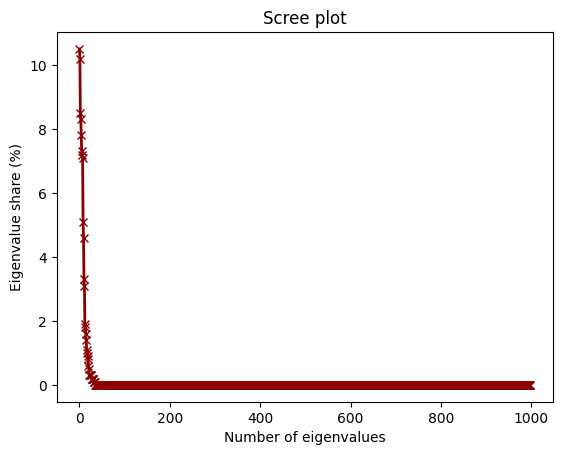

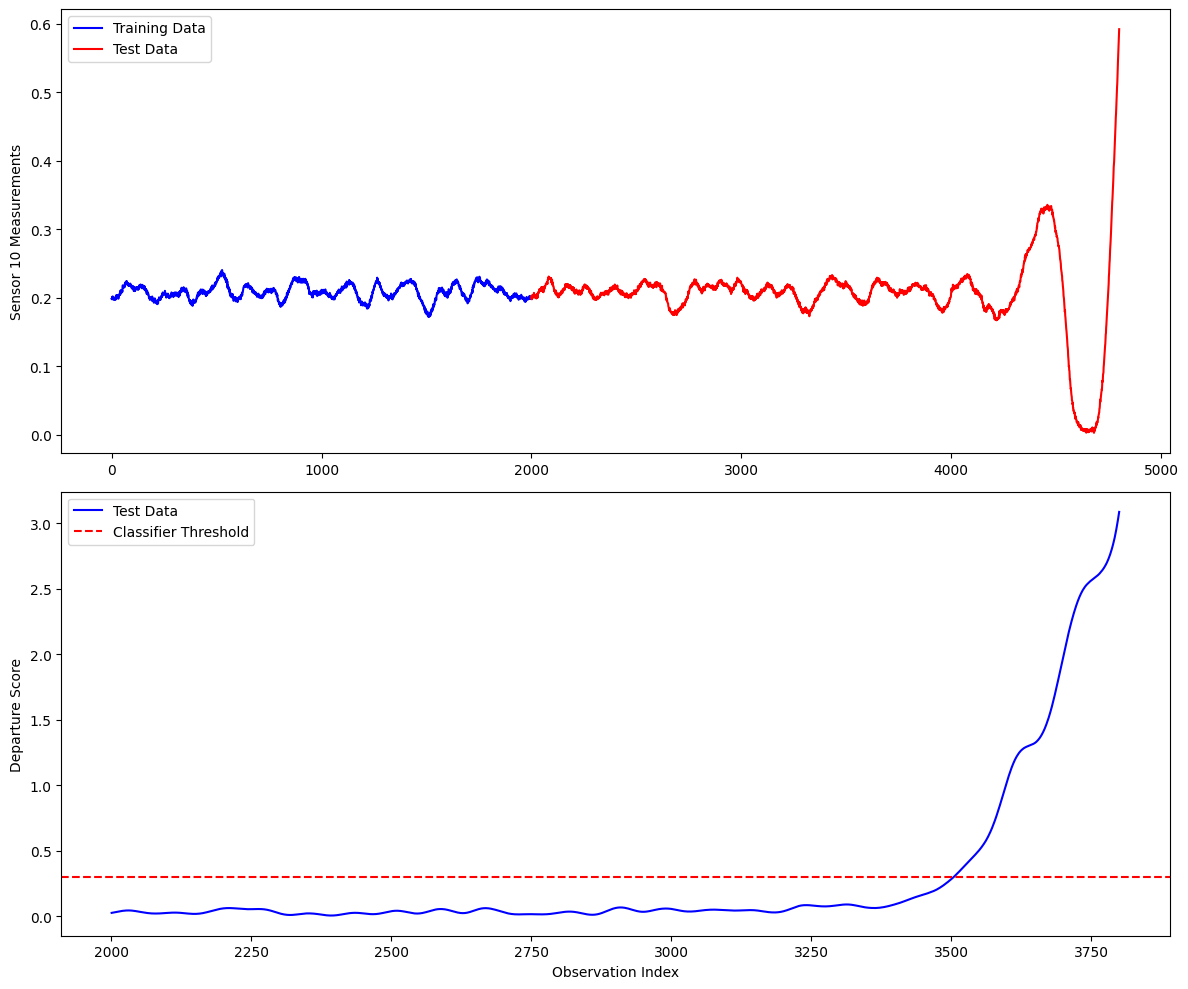

In [3]:
data = np.genfromtxt('D:\CS658 PASAD\DA1_xmv10_359_data_1.csv', delimiter=',')
sensor_index = 9  # Update this index based on which sensor you want to analyze
s = data[:, sensor_index]
anomaly_detection(s, N=2000, L=1000, r=5)

C:\Users\sauga\AppData\Local\Temp\ipykernel_17252\766748577.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.round((np.square(e[1:])/(np.sum(np.square(e[1:]))))*100, decimals=1), 'rx-', color='darkred', linewidth=2)


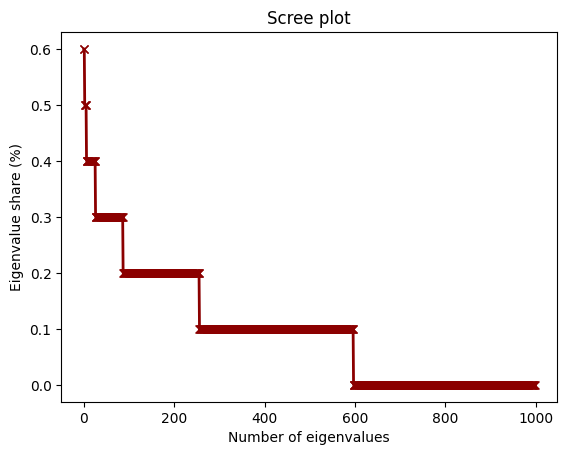

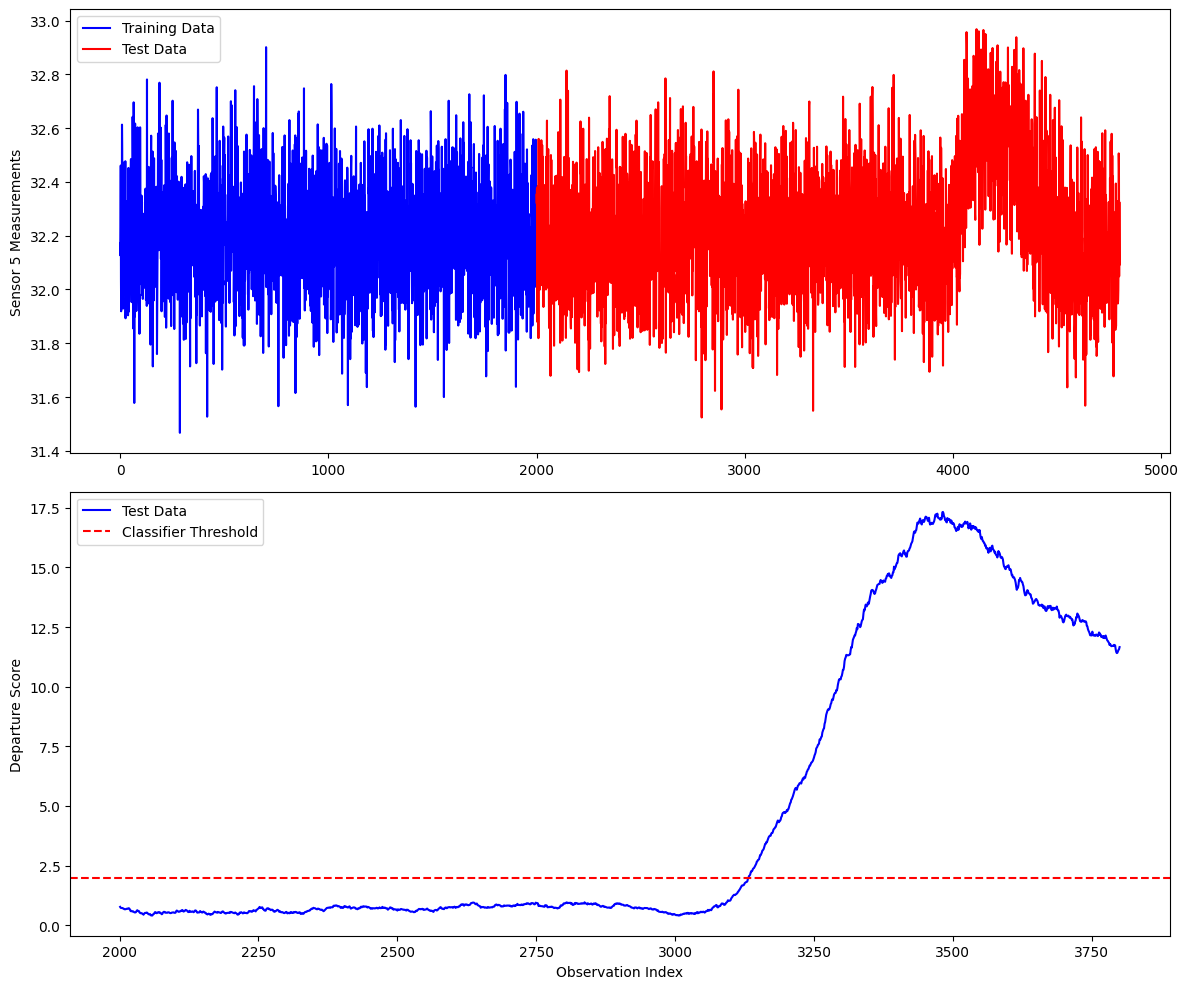

In [4]:
data = np.genfromtxt('D:\CS658 PASAD\DA2_xmeas7_zero_data_1.csv', delimiter=',')
sensor_index = 4  # Update this index based on which sensor you want to analyze
s = data[:, sensor_index]
anomaly_detection(s, N=2000, L=1000, r=15)

C:\Users\sauga\AppData\Local\Temp\ipykernel_17252\766748577.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.round((np.square(e[1:])/(np.sum(np.square(e[1:]))))*100, decimals=1), 'rx-', color='darkred', linewidth=2)


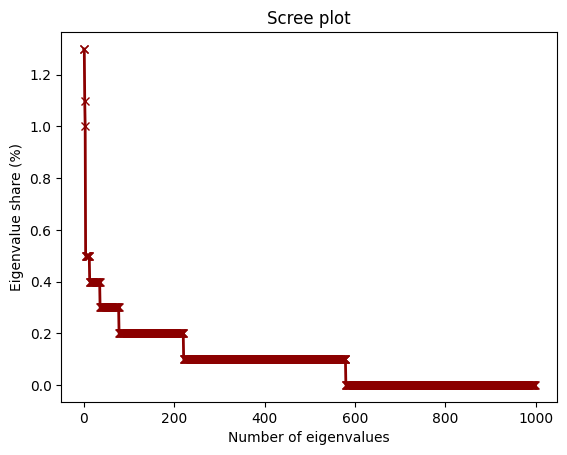

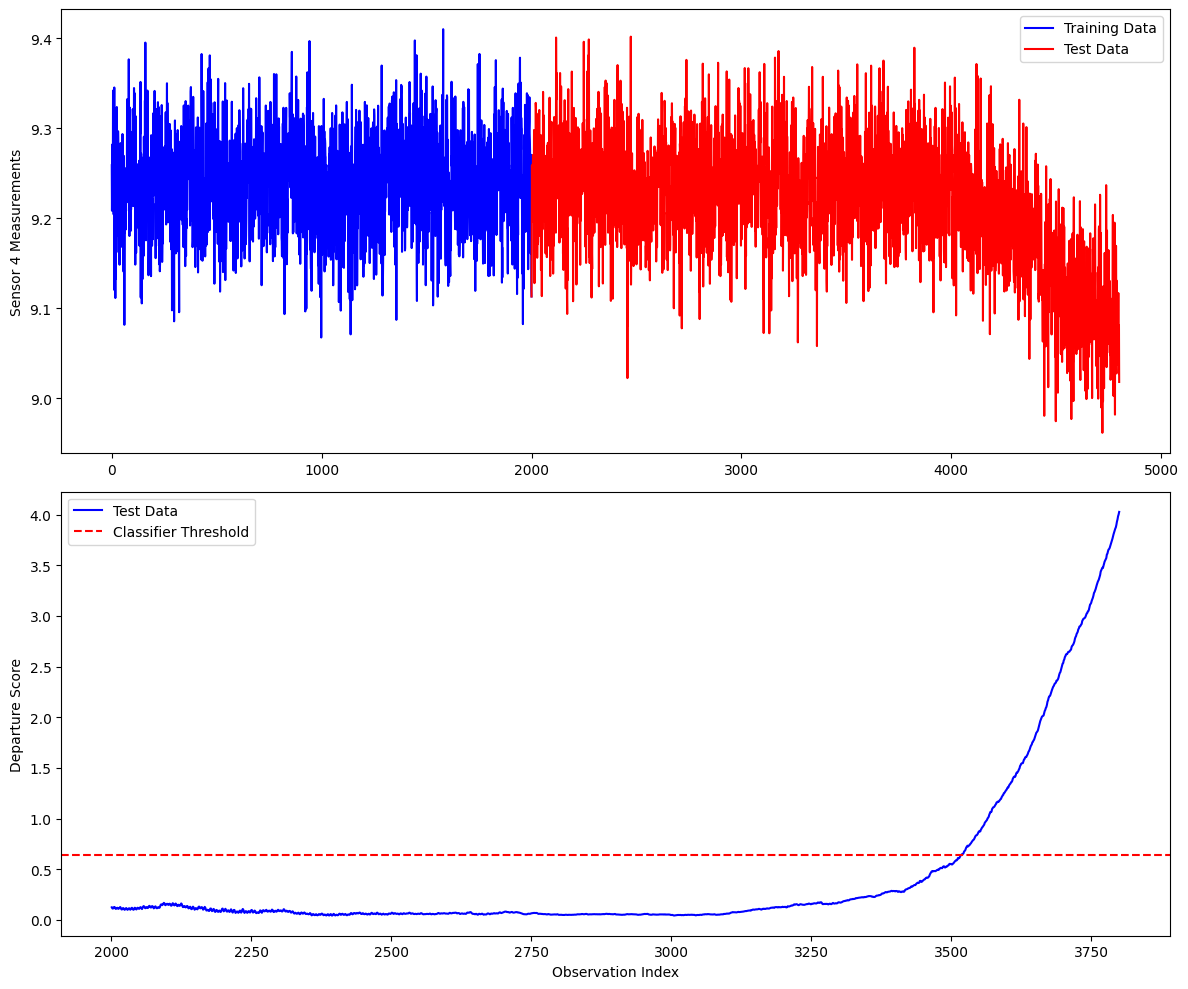

In [5]:
data = np.genfromtxt('D:\CS658 PASAD\SA1_xmv9_hundred_data_1.csv', delimiter=',')
sensor_index = 3  # Update this index based on which sensor you want to analyze
s = data[:, sensor_index]
anomaly_detection(s, N=2000, L=1000, r=15)

C:\Users\sauga\AppData\Local\Temp\ipykernel_17252\766748577.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.round((np.square(e[1:])/(np.sum(np.square(e[1:]))))*100, decimals=1), 'rx-', color='darkred', linewidth=2)


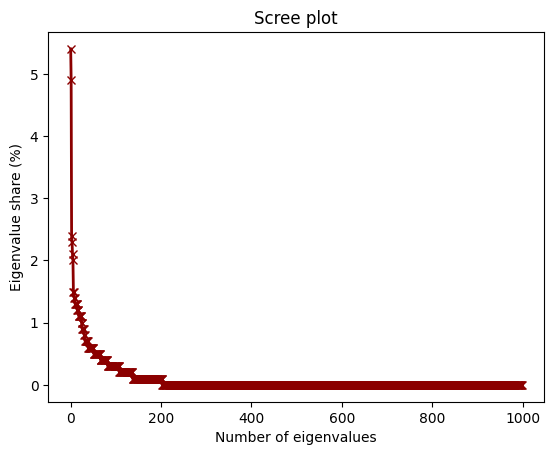

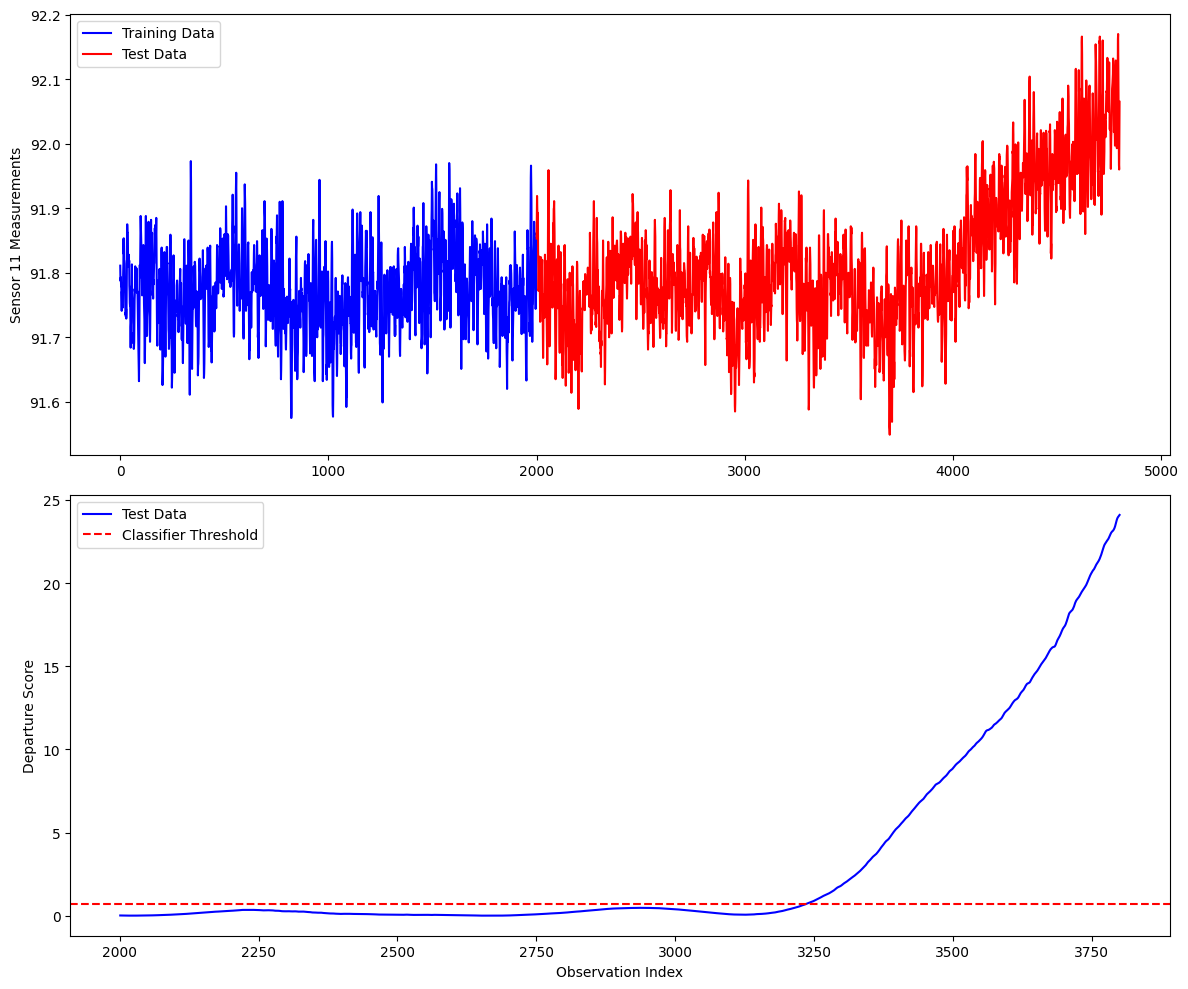

In [6]:
data = np.genfromtxt('D:\CS658 PASAD\SA2_xmv6_twentyeight_data_1.csv', delimiter=',')
sensor_index = 10  # Update this index based on which sensor you want to analyze
s = data[:, sensor_index]
anomaly_detection(s, N=2000, L=1000, r=2)

C:\Users\sauga\AppData\Local\Temp\ipykernel_17252\766748577.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.round((np.square(e[1:])/(np.sum(np.square(e[1:]))))*100, decimals=1), 'rx-', color='darkred', linewidth=2)


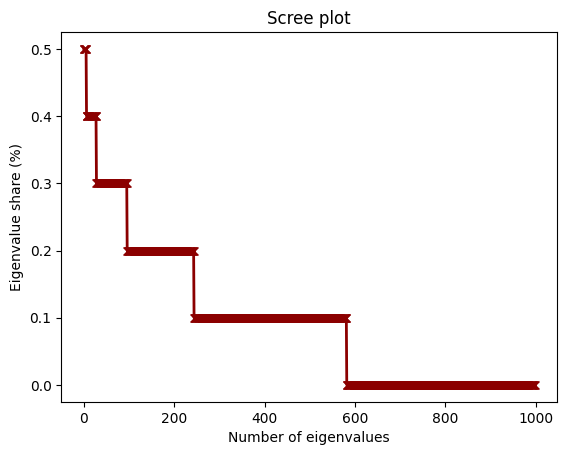

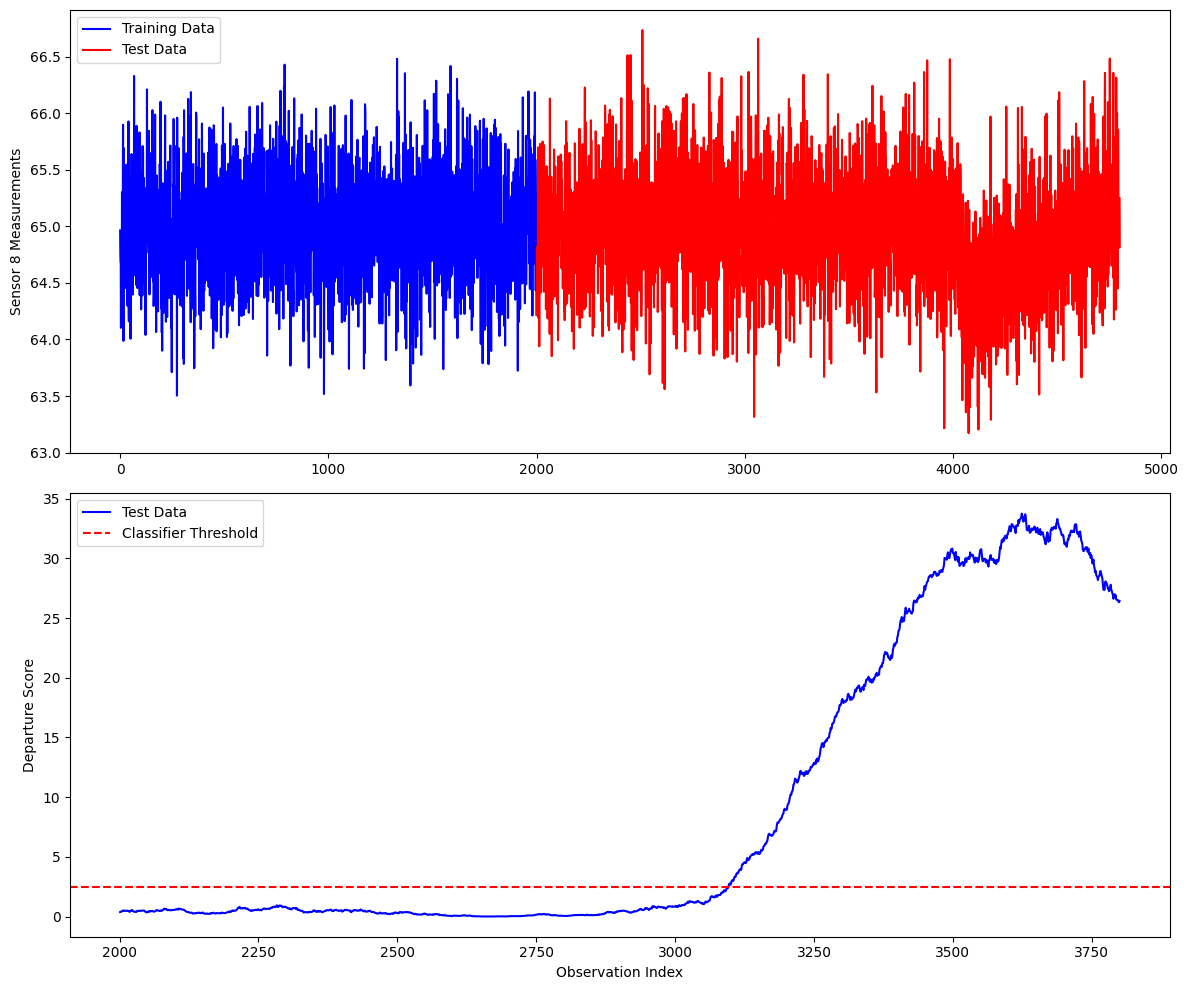

In [7]:
data = np.genfromtxt('D:\CS658 PASAD\SA3_xmeas10_001_data_1.csv', delimiter=',')
sensor_index = 7  # Update this index based on which sensor you want to analyze
s = data[:, sensor_index]
anomaly_detection(s, N=2000, L=1000, r=3)

C:\Users\sauga\AppData\Local\Temp\ipykernel_17252\3989907204.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.round((np.square(e[1:])/(np.sum(np.square(e[1:]))))*100, decimals=1), 'rx-', color='darkred', linewidth=2)


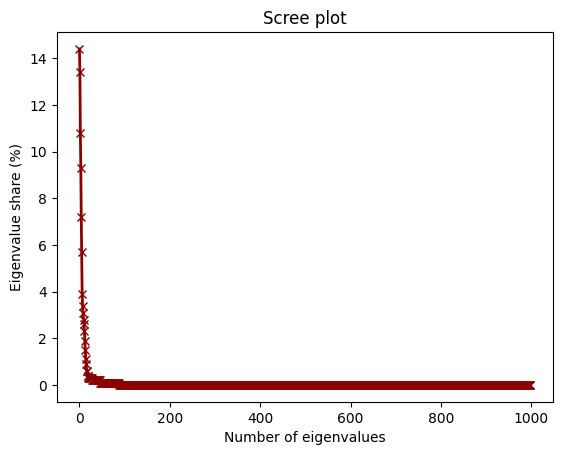

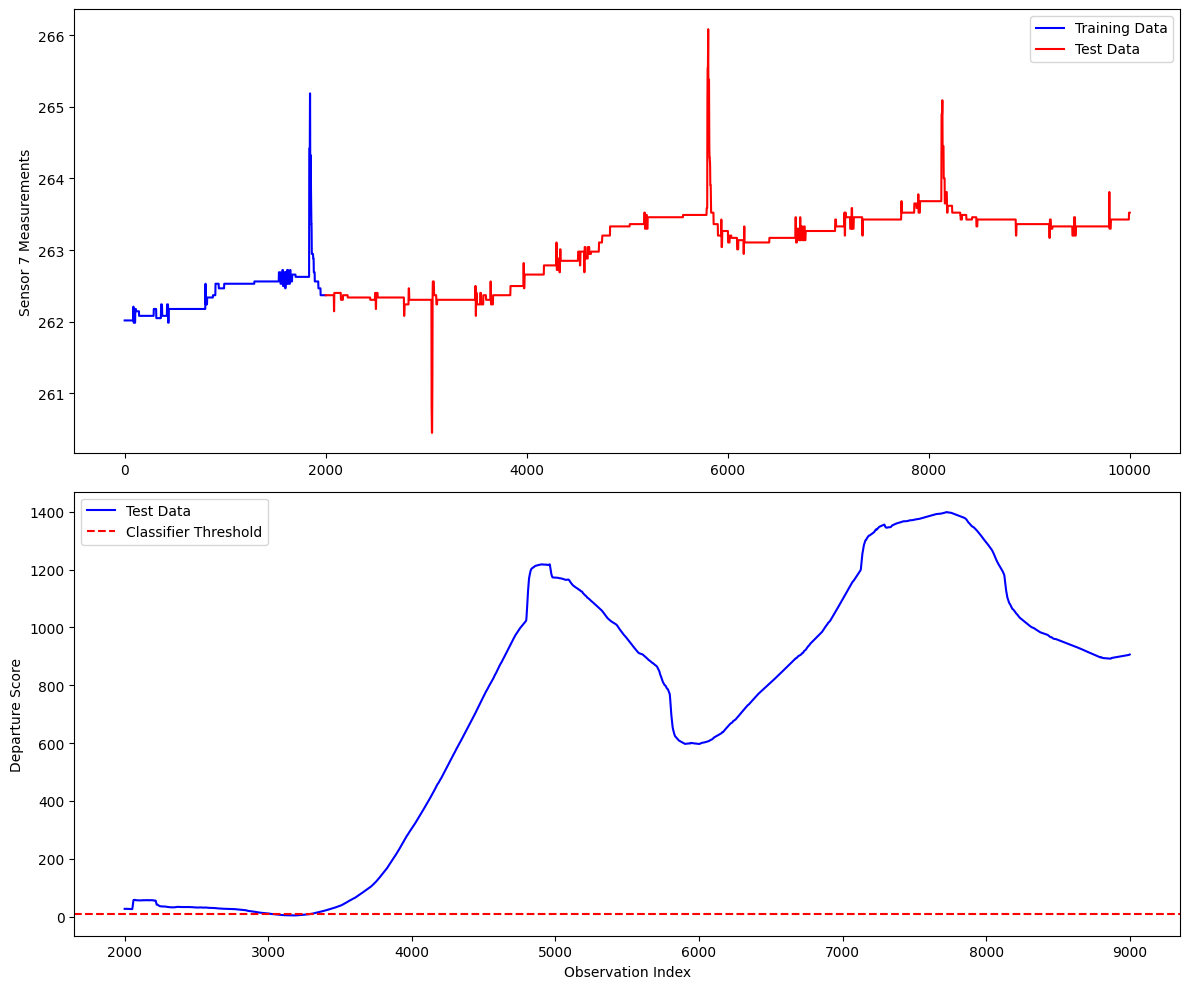

In [8]:
train_data = np.genfromtxt('D:\CS658 PASAD\SWaT_Attack.csv', delimiter=',')
# test_data = np.genfromtxt('D:\CS658 PASAD\SWaT_Attack.csv', delimiter=',')


sensor_index = 6  # Update this index based on which sensor you want to analyze
s = train_data[:, sensor_index]
# t = test_data[:, sensor_index]
r = 40
N = 2000
L = N // 2
T = len(s)
K = N - L + 1 

train = s[:N+1]
# Training Phase
X = hankel(train[:L], train[L-1:])  # Hankel matrix
U, e, _ = svd(X, full_matrices=False)
# Scree plot
plt.figure()
plt.plot(np.round((np.square(e[1:])/(np.sum(np.square(e[1:]))))*100, decimals=1), 'rx-', color='darkred', linewidth=2)
plt.xlabel('Number of eigenvalues')
plt.ylabel('Eigenvalue share (%)')
plt.title('Scree plot')
plt.show()

# Select r based on eigenvalue significance
U = U[:, :r]  # signal subspace
c = np.mean(X[:K], axis=1)
utc = U.T @ c
# nev = np.sqrt(ev[:r] / sum(ev[:r]))

test = s[N+1:]
Xt = hankel(test[:L] , test[L-1:])  # Hankel matrix
D=np.zeros(K)
    
for j in range(K):	
    D[j]=np.linalg.norm(utc - U.T @ Xt[:,j])


dmax=np.amax(D)	
# Detection Phase
d = np.zeros(T - N - L - 1)
x = s[N+1:]
Xt = hankel(s[N+1:N+1+L], s[N+L:T-1])  # Hankel matrix

for i in range(T - N - L -1):
    y = utc - U.T @ Xt[:,i]
    d[i] = y.T @ y

# Plot of the result
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(range(0, N), s[:N], color='blue', label='Training Data')
plt.plot(range(N,T), s[N:T], color='red', label='Test Data')
plt.ylabel(f'Sensor {sensor_index+1} Measurements')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(range(N+1,T-L), d, color='blue', label = 'Test Data')
plt.axhline(y=dmax, color='r', linestyle='--', label='Classifier Threshold')
plt.xlabel('Observation Index')
plt.ylabel('Departure Score')
plt.legend()

plt.tight_layout()
plt.show()

# Measure Average Runtime

In [9]:
import time 

def measure_avg_runtime(s, N, L, r, P):
    T = len(s)
    K = N - L + 1 

    train = s[:N+1]
    # Training Phase
    X = hankel(train[:L], train[L-1:])  # Hankel matrix
    U, e, _ = svd(X, full_matrices=False)
    # Select r based on eigenvalue significance
    U = U[:, :r]  # signal subspace
    c = np.mean(X[:K], axis=1)
    if P == "U_T":
        utc = U.T @ c
    else:
        utc = U @ U.T @ c

    D=np.zeros(K)
        
    for j in range(K):	
        if P == "U_T":
            D[j]=np.linalg.norm(utc - U.T @ X[:,j])
        else:  
            D[j]=np.linalg.norm(utc - U @ U.T @ X[:,j])

    dmax=np.amax(D)	
    
    # Detection Phase
    d = np.zeros(T - N - L - 1)
    x = s[N+1:]
    Xt = hankel(s[N+1:N+1+L], s[N+L:T-1])  # Hankel matrix
    times = []
    for i in range(T - N - L -1): 
        start_time = time.time() 
        if P == "U_T":
            y = utc - U.T @ Xt[:,i]
        else:
            y = utc - U @ U.T @ Xt[:, i]
        d[i] = y.T @ y
        end_time = time.time()
        times.append(end_time - start_time)

    

    # Plot of the result
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 1, 1)
    plt.plot(range(0, N+1), s[:N+1], color='blue', label='Training Data')
    plt.plot(range(N, T), s[N:], color='red', label='Test Data')
    plt.ylabel(f'Sensor {sensor_index+1} Measurements')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(range(N+1, T-L), d, color='blue', label='Test Data')
    plt.axhline(y=dmax, color='r', linestyle='--', label='Classifier Threshold')
    plt.xlabel('Observation Index')
    plt.ylabel(f'Departure Score with {P} projection')
    plt.legend()
    return np.mean(times)

Average runtime for linear map: 1.058922873602973e-05 seconds
Average runtime for projection matrix: 0.007906658781899346 seconds


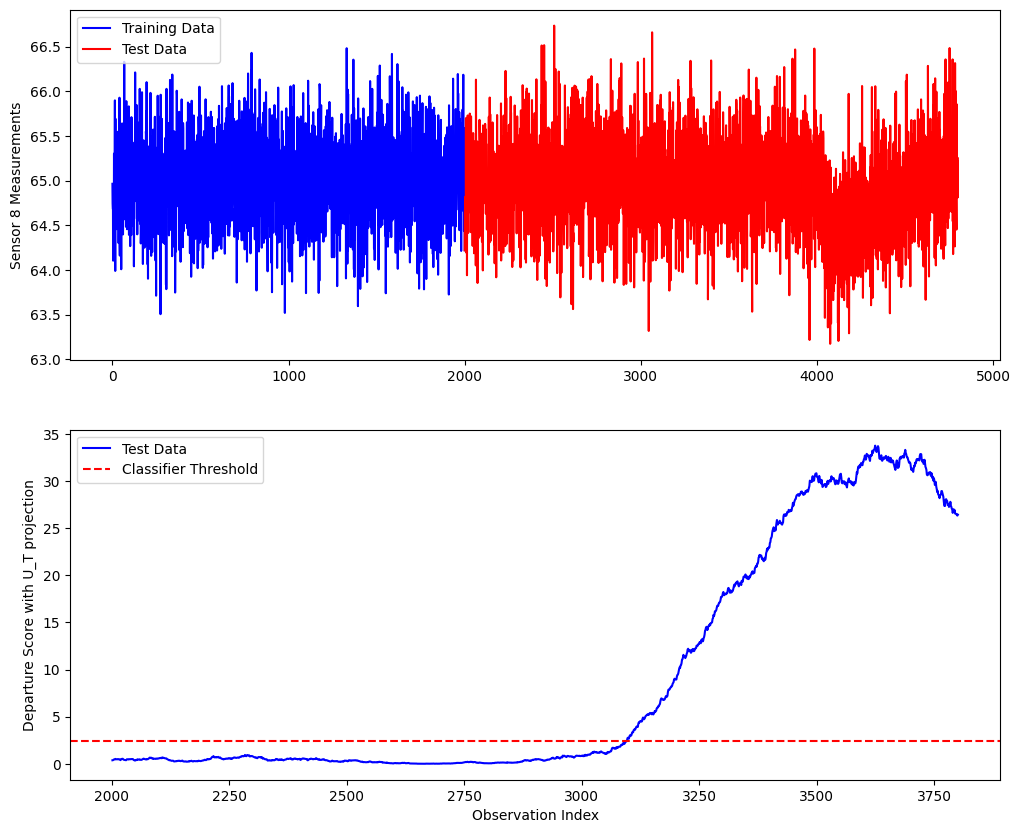

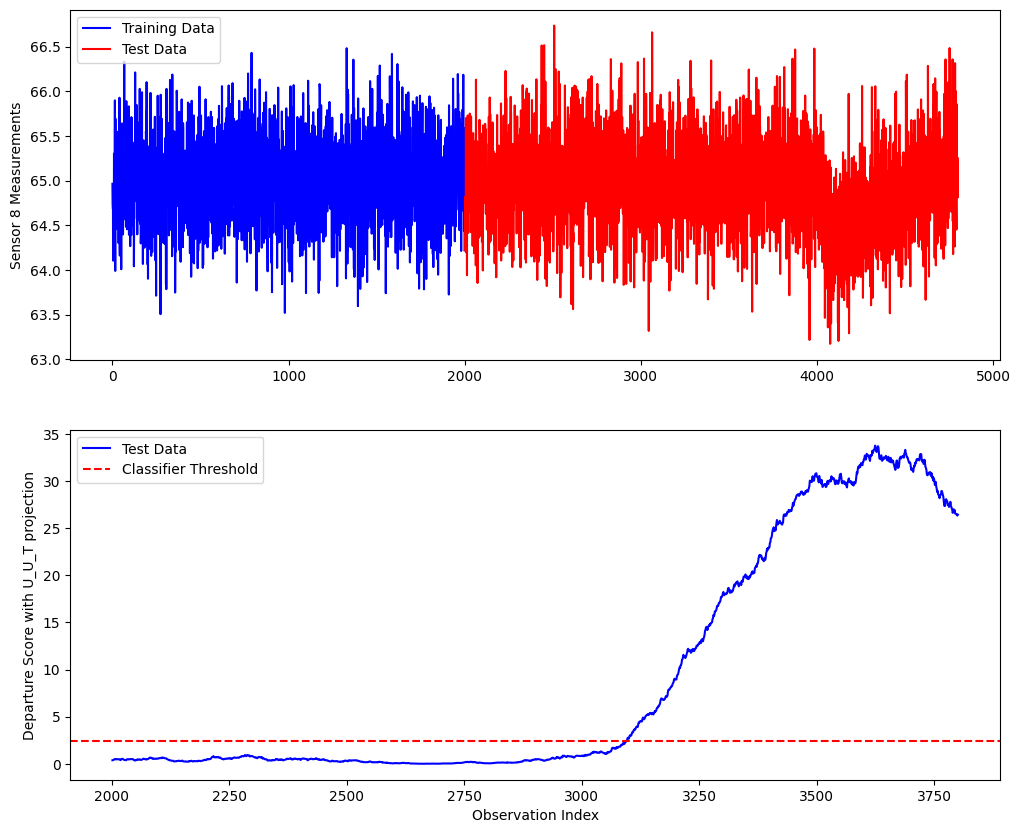

In [10]:
data = np.genfromtxt('D:\CS658 PASAD\SA3_xmeas10_001_data_1.csv', delimiter=',')
sensor_index = 7  # Update this index based on which sensor you want to analyze
s = data[:, sensor_index]
T_linear = measure_avg_runtime(s, N=2000, L=1000, r=3, P="U_T")
s = data[:, sensor_index]
T_projection = measure_avg_runtime(s, N=2000, L=1000, r=3, P="U_U_T")
print(f"Average runtime for linear map: {T_linear} seconds")
print(f"Average runtime for projection matrix: {T_projection} seconds")

Average runtime for linear map: 1.623443194798061e-05 seconds
Average runtime for projection matrix: 0.008759142909731184 seconds


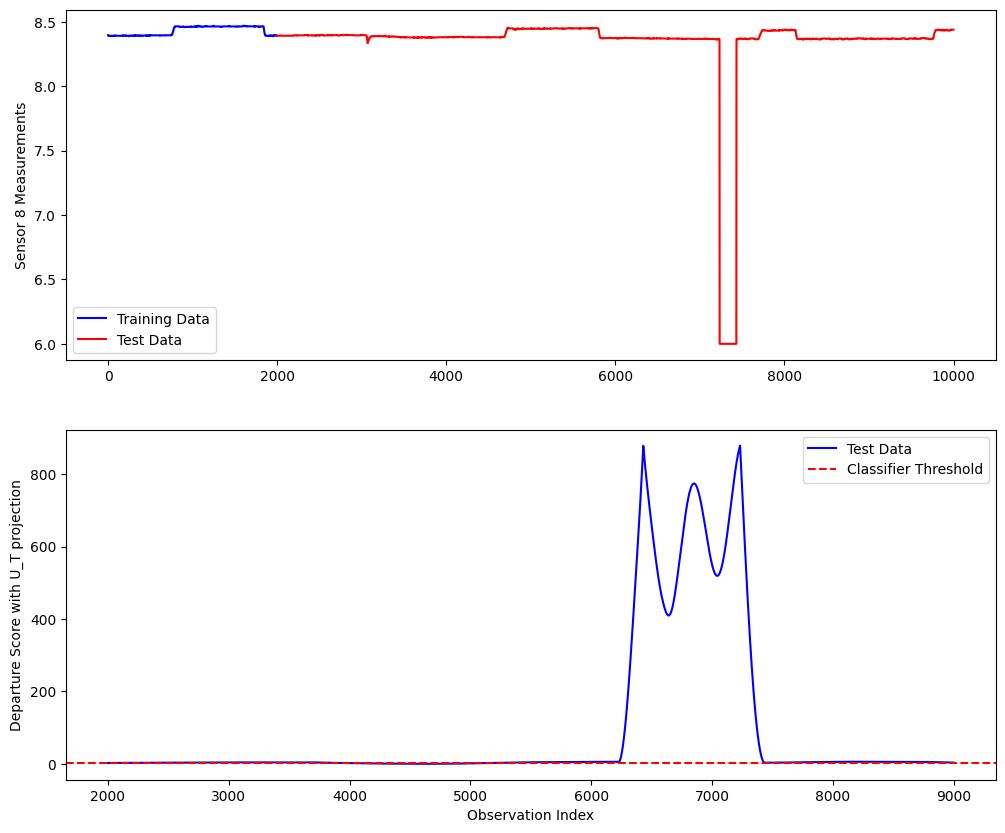

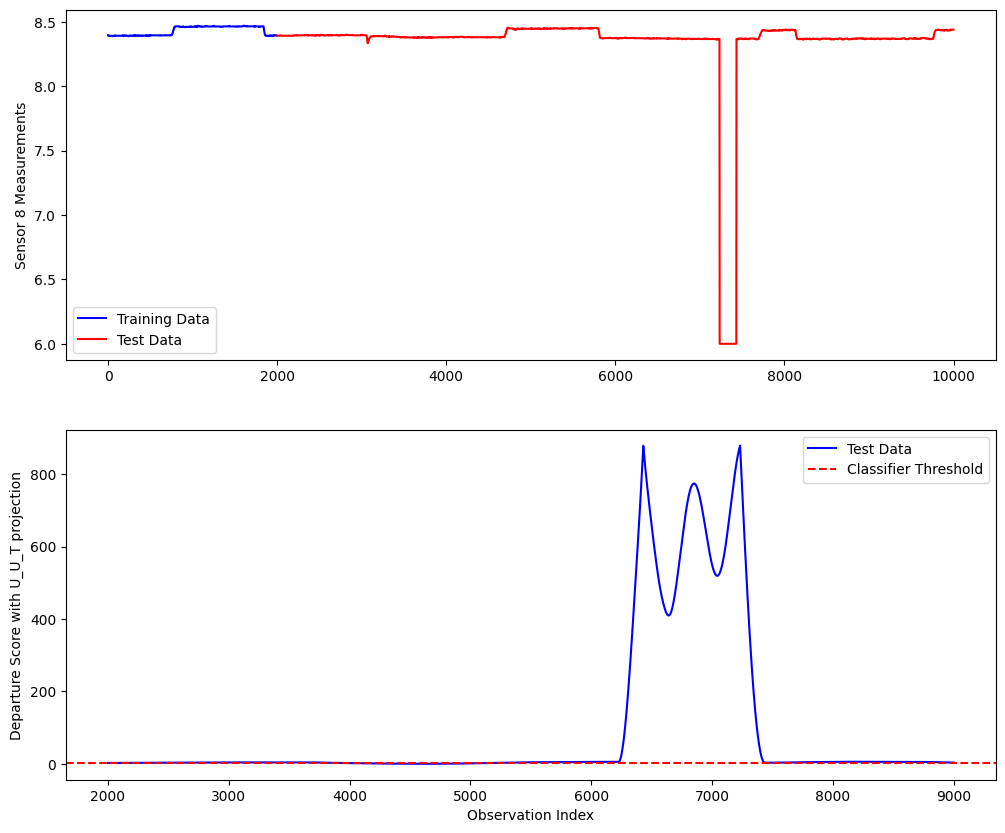

In [11]:
data = np.genfromtxt('D:\CS658 PASAD\SWaT_Attack.csv', delimiter=',')
sensor_index = 7  # Update this index based on which sensor you want to analyze
s = data[:, sensor_index]
T_linear = measure_avg_runtime(s, N=2000, L=1000, r=3, P="U_T")
s = data[:, sensor_index]
T_projection = measure_avg_runtime(s, N=2000, L=1000, r=3, P="U_U_T")
print(f"Average runtime for linear map: {T_linear} seconds")
print(f"Average runtime for projection matrix: {T_projection} seconds")

# Question 1, Part 3 - Attack Scenario Analysis

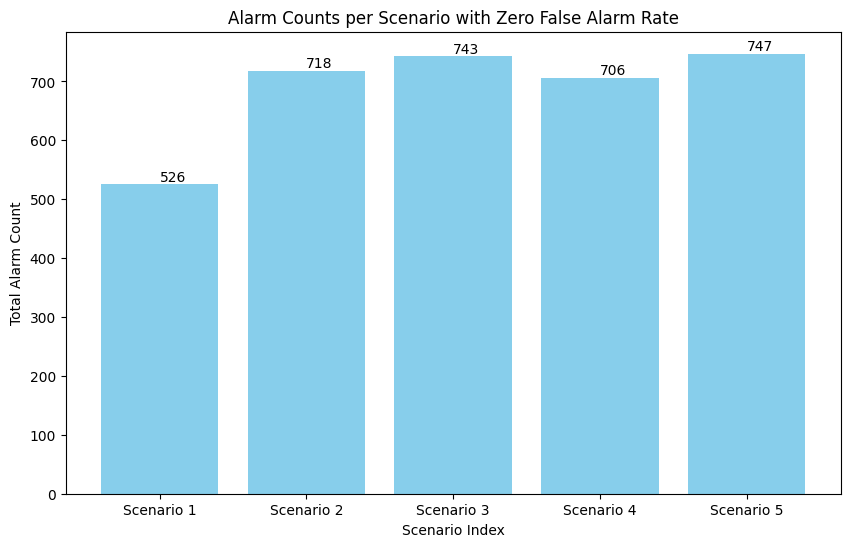

In [12]:
def count_alarms(s, N, L, r):
    T = len(s)
    K = N - L + 1 
    train = s[:N+1]
    # Training Phase
    X = hankel(train[:L], train[L-1:])  # Hankel matrix
    U, e, _ = svd(X, full_matrices=False)
    U = U[:, :r]  # signal subspace
    c = np.mean(X[:K], axis=1)
    utc = U.T @ c

    # Compute departure scores during training
    D_train = np.zeros(K)
    for j in range(K):    
        D_train[j] = np.linalg.norm(utc - U.T @ X[:, j])

    # Maximum threshold from training data to avoid false alarms
    threshold = np.amax(D_train)

    # Detection Phase
    d = np.zeros(T - N - L - 1)
    x = s[N+1:]
    Xt = hankel(s[N+1:N+1+L], s[N+L:T-1])  # Hankel matrix

    for i in range(T - N - L -1):        
        y = utc - U.T @ Xt[:,i]
        d[i] = y.T @ y

    # Count alarms
    alarms = np.sum(d > threshold)
    return alarms

def plot_alarm_counts(scenarios, N, L, r):
    alarm_counts = []
    sensor_index = 10  # Update this index based on which sensor you want to analyze
    for sc in scenarios:
        s = genfromtxt(sc, delimiter=',')[ : , sensor_index]
        alarms = count_alarms(s, N, L, r)
        alarm_counts.append(alarms)
    
    # Bar plot of the results
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(scenarios)), alarm_counts, color='skyblue')
    plt.xlabel('Scenario Index')
    plt.ylabel('Total Alarm Count')
    plt.title('Alarm Counts per Scenario with Zero False Alarm Rate')

    # Adding the count above each bar
    for bar, alarm_count in zip(bars, alarm_counts):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(alarm_count), va='bottom')  # Vertical alignment for text

    plt.xticks(range(len(scenarios)), [f'Scenario {i+1}' for i in range(len(scenarios))])
    plt.show()

# Example usage
scenarios = [
    'D:\CS658 PASAD\DA1_xmv10_359_data_1.csv',
    'D:\CS658 PASAD\DA2_xmeas7_zero_data_1.csv',
    'D:\CS658 PASAD\SA1_xmv9_hundred_data_1.csv',
    'D:\CS658 PASAD\SA2_xmv6_twentyeight_data_1.csv',
    'D:\CS658 PASAD\SA3_xmeas10_001_data_1.csv'
]
plot_alarm_counts(scenarios, 2000, 1000, 3)

# Question 2

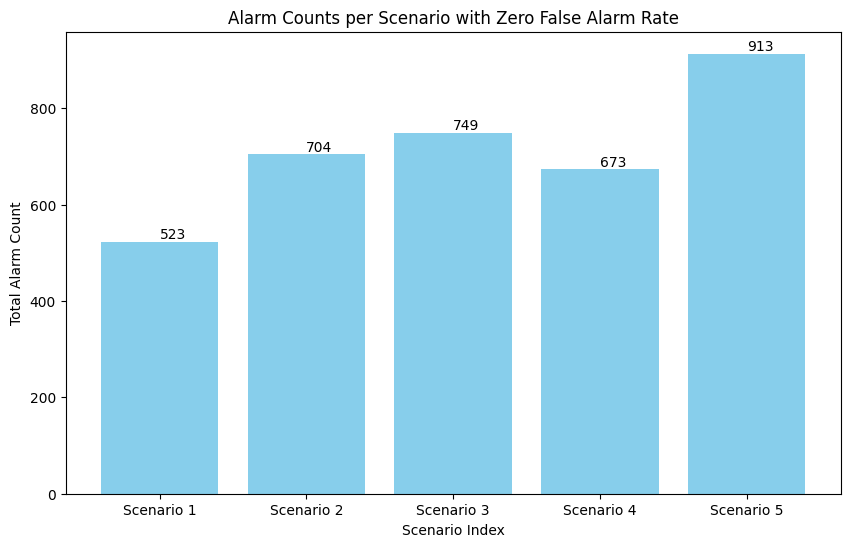

In [13]:
def count_alarms_centroid(s, N, L, r):
    T = len(s)
    K = N - L + 1 
    train = s[:N+1]
    # Training Phase
    X = hankel(train[:L], train[L-1:])  # Hankel matrix
    U, e, _ = svd(X, full_matrices=False)
    U = U[:, :r]  # signal subspace
    c = (np.min(X[:K], axis=1) + np.max(X[:K], axis=1)) / 2
    utc = U.T @ c

    # Compute departure scores during training
    D_train = np.zeros(K)
    for j in range(K):    
        D_train[j] = np.linalg.norm(utc - U.T @ X[:, j])

    # Maximum threshold from training data to avoid false alarms
    threshold = np.amax(D_train)

    # Detection Phase
    d = np.zeros(T - N - L - 1)
    x = s[N+1:]
    Xt = hankel(s[N+1:N+1+L], s[N+L:T-1])  # Hankel matrix

    for i in range(T - N - L -1):        
        y = utc - U.T @ Xt[:,i]
        d[i] = y.T @ y

    # Count alarms
    alarms = np.sum(d > threshold)
    return alarms

def plot_alarm_counts(scenarios, N, L, r):
    alarm_counts = []
    sensor_index = 10  # Update this index based on which sensor you want to analyze
    for sc in scenarios:
        s = genfromtxt(sc, delimiter=',')[ : , sensor_index]
        alarms = count_alarms_centroid(s, N, L, r)
        alarm_counts.append(alarms)
    
    # Bar plot of the results
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(scenarios)), alarm_counts, color='skyblue')
    plt.xlabel('Scenario Index')
    plt.ylabel('Total Alarm Count')
    plt.title('Alarm Counts per Scenario with Zero False Alarm Rate')

    # Adding the count above each bar
    for bar, alarm_count in zip(bars, alarm_counts):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(alarm_count), va='bottom')  # Vertical alignment for text

    plt.xticks(range(len(scenarios)), [f'Scenario {i+1}' for i in range(len(scenarios))])
    plt.show()

# Example usage
scenarios = [
    'D:\CS658 PASAD\DA1_xmv10_359_data_1.csv',
    'D:\CS658 PASAD\DA2_xmeas7_zero_data_1.csv',
    'D:\CS658 PASAD\SA1_xmv9_hundred_data_1.csv',
    'D:\CS658 PASAD\SA2_xmv6_twentyeight_data_1.csv',
    'D:\CS658 PASAD\SA3_xmeas10_001_data_1.csv'
]
plot_alarm_counts(scenarios, 2000, 1000, 3)

# Question 3, Part 2 - Implementation and Comparison

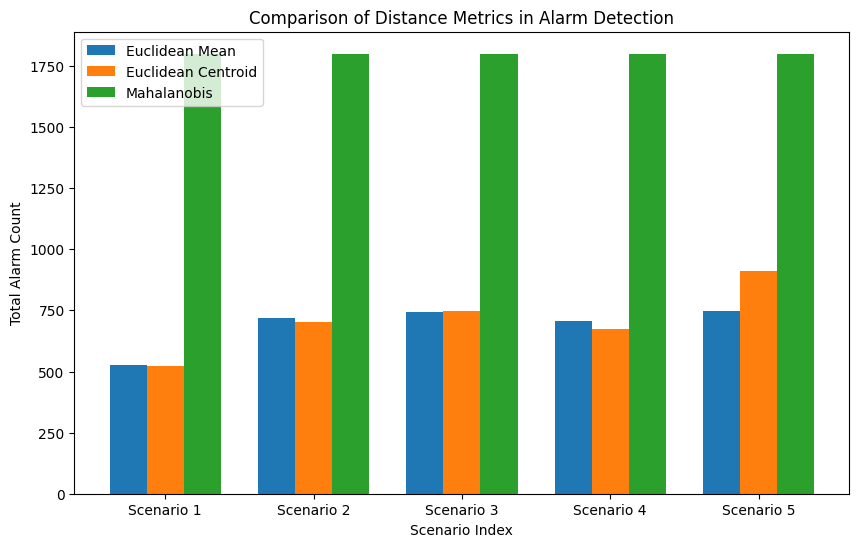

In [14]:
from scipy.spatial import distance

def count_alarms_mahalanobis(s, N, L, r):
    T = len(s)
    K = N - L + 1 
    train = s[:N+1]
    X = hankel(train[:L], train[L-1:])
    U, e, _ = svd(X, full_matrices=False)
    U = U[:, :r]
    c = (np.min(X[:K], axis=1) + np.max(X[:K], axis=1)) / 2

    # Projecting the data onto the subspace for normal operations
    X_subspace = U.T @ X  # Now X_subspace is r x N
    c_subspace = U.T @ c  # Now c_subspace is r x 1

    # Calculate the covariance matrix using the projected subspace
    cov_matrix_subspace = np.cov(X_subspace)
    inv_cov_matrix_subspace = np.linalg.inv(cov_matrix_subspace)
    
    # Compute departure scores using Mahalanobis distance in the reduced subspace
    D_train = np.zeros(K)
    for j in range(K):    
        D_train[j] = distance.mahalanobis(X_subspace[:, j], c_subspace, inv_cov_matrix_subspace)

    threshold = np.amax(D_train)
    # Detection Phase
    d = np.zeros(T - N - L - 1)
    x = s[N+1:]
    # Xt = hankel(s[N+1:N+1+L], s[N+L:T-1])  # Hankel matrix
    x_projected = U.T @ hankel(s[N+1:N+1+L], s[N+L:T-1])[:, -1]  # Project the initial window onto the subspace

    for i in range(T - N - L -1):        
        d[i] = distance.mahalanobis(x_projected, c_subspace, inv_cov_matrix_subspace)

    alarms = np.sum(d > threshold)
    return alarms


def compare_methods(scenarios, N, L, r):
    counts_euclidean_mean = []
    counts_euclidean_centroid = []
    counts_mahalanobis = []
    sensor_index = 10  # Assume sensor data index
    for sc in scenarios:
        s = genfromtxt(sc, delimiter=',')[ : , sensor_index]
        counts_euclidean_mean.append(count_alarms(s, N, L, r))
        counts_euclidean_centroid.append(count_alarms_centroid(s, N, L, r))
        counts_mahalanobis.append(count_alarms_mahalanobis(s, N, L, r))
    
    indices = np.arange(len(scenarios))
    bar_width = 0.25
    
    plt.figure(figsize=(10, 6))
    plt.bar(indices, counts_euclidean_mean, bar_width, label='Euclidean Mean')
    plt.bar(indices + bar_width, counts_euclidean_centroid, bar_width, label='Euclidean Centroid')
    plt.bar(indices + 2 * bar_width, counts_mahalanobis, bar_width, label='Mahalanobis')
    
    plt.xlabel('Scenario Index')
    plt.ylabel('Total Alarm Count')
    plt.title('Comparison of Distance Metrics in Alarm Detection')
    plt.xticks(indices + bar_width, [f'Scenario {i+1}' for i in range(len(scenarios))])
    plt.legend()
    plt.show()

# Example usage
scenarios = [
    'D:\CS658 PASAD\DA1_xmv10_359_data_1.csv',
    'D:\CS658 PASAD\DA2_xmeas7_zero_data_1.csv',
    'D:\CS658 PASAD\SA1_xmv9_hundred_data_1.csv',
    'D:\CS658 PASAD\SA2_xmv6_twentyeight_data_1.csv',
    'D:\CS658 PASAD\SA3_xmeas10_001_data_1.csv'
]
compare_methods(scenarios, 2000, 1000, 3)


# Question 3, Part 3 - Runtime Analysis

In [19]:
import time 

def measure_avg_runtime_mahalanobis(s, N, L, r):
    T = len(s)
    K = N - L + 1 
    train = s[:N+1]
    X = hankel(train[:L], train[L-1:])
    U, e, _ = svd(X, full_matrices=False)
    U = U[:, :r]
    c = (np.min(X[:K], axis=1) + np.max(X[:K], axis=1)) / 2

    # Projecting the data onto the subspace for normal operations
    X_subspace = U.T @ X  # Now X_subspace is r x N
    c_subspace = U.T @ c  # Now c_subspace is r x 1

    # Calculate the covariance matrix using the projected subspace
    cov_matrix_subspace = np.cov(X_subspace)
    inv_cov_matrix_subspace = np.linalg.inv(cov_matrix_subspace)
    
    # Compute departure scores using Mahalanobis distance in the reduced subspace
    D_train = np.zeros(K)
    for j in range(K):    
        D_train[j] = distance.mahalanobis(X_subspace[:, j], c_subspace, inv_cov_matrix_subspace)

    threshold = np.amax(D_train)

    # Detection Phase
    d = np.zeros(T - N - L - 1)
    x = s[N+1:]
    # Xt = hankel(s[N+1:N+1+L], s[N+L:T-1])  # Hankel matrix
    x_projected = U.T @ hankel(s[N+1:N+1+L], s[N+L:T-1])[:, -1]  # Project the initial window onto the subspace
    times = []
    for i in range(T - N - L -1):        
        start_time = time.time()
        d[i] = distance.mahalanobis(x_projected, c_subspace, inv_cov_matrix_subspace)
        end_time = time.time()
        times.append(end_time - start_time)

    

    return np.mean(times)

In [23]:
def measure_avg_runtime_centroid(s, N, L, r):
    T = len(s)
    K = N - L + 1 
    train = s[:N+1]
    # Training Phase
    X = hankel(train[:L], train[L-1:])  # Hankel matrix
    U, e, _ = svd(X, full_matrices=False)
    U = U[:, :r]  # signal subspace
    c = (np.min(X[:K], axis=1) + np.max(X[:K], axis=1)) / 2
    utc = U.T @ c

    # Compute departure scores during training
    D_train = np.zeros(K)
    for j in range(K):    
        D_train[j] = np.linalg.norm(utc - U.T @ X[:, j])

    # Maximum threshold from training data to avoid false alarms
    threshold = np.amax(D_train)
    times = []
    for i in range(T - N - L -1): 
        start_time = time.time() 
        y = utc - U.T @ Xt[:,i]
        d[i] = y.T @ y
        end_time = time.time()
        times.append(end_time - start_time)

    return np.mean(times)

In [24]:
def measure_avg_runtime_mean(s, N, L, r, P):
    T = len(s)
    K = N - L + 1 

    train = s[:N+1]
    # Training Phase
    X = hankel(train[:L], train[L-1:])  # Hankel matrix
    U, e, _ = svd(X, full_matrices=False)
    # Select r based on eigenvalue significance
    U = U[:, :r]  # signal subspace
    c = np.mean(X[:K], axis=1)
    if P == "U_T":
        utc = U.T @ c
    else:
        utc = U @ U.T @ c
    # nev = np.sqrt(ev[:r] / sum(ev[:r]))

    D=np.zeros(K)
        
    for j in range(K):	
        if P == "U_T":
            D[j]=np.linalg.norm(utc - U.T @ X[:,j])
        else:  
            D[j]=np.linalg.norm(utc - U @ U.T @ X[:,j])

    dmax=np.amax(D)	
    times = []
    for i in range(T - N - L -1): 
        start_time = time.time() 
        if P == "U_T":
            y = utc - U.T @ Xt[:,i]
        else:
            y = utc - U @ U.T @ Xt[:, i]
        d[i] = y.T @ y
        end_time = time.time()
        times.append(end_time - start_time)

    return np.mean(times)

In [25]:
data = np.genfromtxt('D:\CS658 PASAD\SA3_xmeas10_001_data_1.csv', delimiter=',')
sensor_index = 7  # Update this index based on which sensor you want to analyze
s = data[:, sensor_index]
T_linear = measure_avg_runtime_mean(s, N=2000, L=1000, r=3, P="U_T")
T_projection = measure_avg_runtime_mean(s, N=2000, L=1000, r=3, P="U_U_T")
T_centroid = measure_avg_runtime_centroid(s, N=2000, L=1000, r=3)
T_maha = measure_avg_runtime_mahalanobis(s, N=2000, L=1000, r=3)
print(f"Average runtime for linear map: {T_linear} seconds")
print(f"Average runtime for projection matrix: {T_projection} seconds")
print(f"Average runtime for Euclidean distance with centroid: {T_centroid} seconds")
print(f"Average runtime for Mahalanonis distance with centroid: {T_maha} seconds")

Average runtime for linear map: 1.3887484868367513e-05 seconds
Average runtime for projection matrix: 0.008944931427637736 seconds
Average runtime for Euclidean distance with centroid: 1.7218457327948677e-05 seconds
Average runtime for Mahalanonis distance with centroid: 6.089342965020074e-06 seconds
